# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv('data/Online_Retail.zip', parse_dates=['InvoiceDate'], encoding = 'latin1', dtype={'CustomerID': 'Int32'})
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
# online_rt.dtypes

In [4]:
online_rt1 = online_rt.copy()

### Step 4. Create a bar chart with the 10 countries that have the most 'Quantity' ordered except UK

In [5]:
country_grp = online_rt.groupby('Country').sum()
country_grp.drop(['UnitPrice', 'CustomerID'], axis=1, inplace=True)
country_grp.sort_values('Quantity', ascending=False, inplace=True)
countries_top10 = country_grp.iloc[1:11]
# countries_top10

In [6]:
x = countries_top10.index
y = countries_top10['Quantity'].values

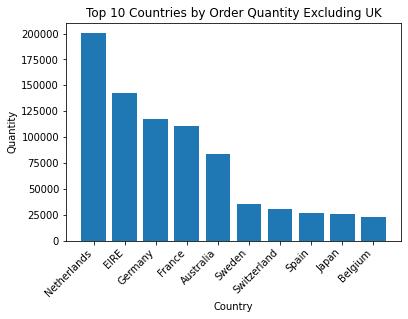

In [7]:
plt.bar(x,y)

plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Countries by Order Quantity Excluding UK')

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### Step 5.  Exclude negative Quantity entries

In [8]:
# filter out negative Quantity entries and negative/zero UnitPrice entries
filt = (online_rt['Quantity'] >= 0) & (online_rt['UnitPrice'] > 0)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [9]:
# calculate 'Quantity' 'UnitPrice ratio'
online_rt['ratio_Quantity_UPrice'] = online_rt['Quantity'] / online_rt['UnitPrice']

In [10]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ratio_Quantity_UPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2.352941
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.909091
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,14.117647
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2.857143
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.963855
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.963855


In [11]:
# filt2 = filt & (online_rt['Country'] == 'Germany')
# germany = online_rt[filt2]
# germany

In [12]:
# germany['CustomerID'].nunique()

In [13]:
# germany['Country'].count()

In [14]:
# germany['Country'].value_counts()

In [15]:
# germany['CustomerID'].value_counts()

In [16]:
# germany['ratio_Quantity_UPrice'].isna().sum()

In [17]:
#germany_max = germany.groupby('CustomerID').max()
#germany_max.sort_values(by=['ratio_Quantity_UPrice'], ascending=False, inplace=True)
#germany_max

In [18]:
online_rt = online_rt[filt]
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ratio_Quantity_UPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2.352941
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.909091
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.769912
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,14.117647
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2.857143
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.963855
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.963855


In [19]:
# create a subset dataframe which includes index: CustomerID, columns: Country, ratio_Quantity_UPrice
online_rt_sub = online_rt.iloc[:, 6:]
online_rt_id = online_rt_sub.groupby('CustomerID').max()
online_rt_id

,Country,ratio_Quantity_UPrice
CustomerID,,
12346,United Kingdom,71360.576923
12347,Iceland,230.769231
12348,Finland,496.551724
12349,Italy,59.523810
12350,Norway,28.235294
...,...,...
18280,United Kingdom,2.711864
18281,United Kingdom,28.571429
18282,United Kingdom,165.517241


In [20]:
# Determine top 3 countries with maximum ratio_Quantity_UPrice, exc. UK

online_rt_country = online_rt_id.groupby('Country').max()
online_rt_country.sort_values(by=['ratio_Quantity_UPrice'], ascending=False, inplace=True)

# top 3 countries by Quantity per Unit Price ratio, excluding the UK:
top3 = online_rt_country.index[1:4]
top3.values

array(['EIRE', 'Germany', 'France'], dtype=object)

In [21]:
# filter for top3 countries
filt2 = online_rt_id['Country'].isin(top3.values)
online_rt_id_top3 = online_rt_id[filt2]
online_rt_id_top3

,Country,ratio_Quantity_UPrice
CustomerID,,
12413,France,28.235294
12426,Germany,250.000000
12427,Germany,1371.428571
12437,France,184.615385
12441,France,59.523810
...,...,...
14016,EIRE,342.857143
14156,EIRE,9000.000000
14277,France,166.666667


In [22]:
# online_rt_id_top3[online_rt_id_top3['Country'] == 'Germany'].sort_values(by=['ratio_Quantity_UPrice'], ascending=False)

In [23]:
# online_rt_id_top3[online_rt_id_top3['Country'] == 'EIRE'].sort_values(by=['ratio_Quantity_UPrice'], ascending=False)

In [24]:
# online_rt_id_top3[online_rt_id_top3['Country'] == 'France'].sort_values(by=['ratio_Quantity_UPrice'], ascending=False)

In [25]:
x = online_rt_id_top3.index
y = online_rt_id_top3['ratio_Quantity_UPrice'].values

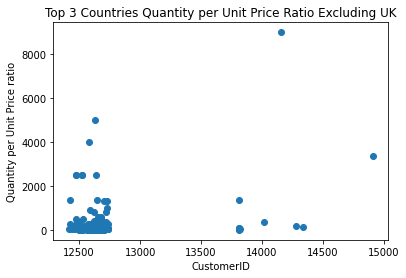

In [26]:
plt.scatter(x,y)

plt.xlabel('CustomerID')
plt.ylabel('Quantity per Unit Price ratio')
plt.title('Top 3 Countries Quantity per Unit Price Ratio Excluding UK')

plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [27]:
online_rt1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [28]:
online_rt1['UnitPrice'].dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [29]:
filt3 = (online_rt1['CustomerID'] == 12346) | (online_rt1['CustomerID'] == 12347)
online_rt1[filt3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [30]:
# Top 3 Countries by volume (ie total quantity), exc. UK
top3 = country_grp.iloc[1:4]
top3

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448


##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [31]:
online_rt1['Revenue'] = online_rt1['Quantity'] * online_rt1['UnitPrice']
online_rt1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [32]:
avg_price = online_rt1.groupby(by=['Country', 'CustomerID']).mean()
avg_price.drop(columns=['Quantity', 'Revenue'], inplace=True)
avg_price.rename(columns={'UnitPrice': 'AvgPrice'}, inplace=True)

In [33]:
avg_price

AvgPrice
Country        CustomerID          
Australia      12386       2.391000
               12388       2.777700
               12393       2.279688
               12415       3.213136
               12422       2.434286
...                             ...
United Kingdom 18287       1.493571
Unspecified    12363       2.311739
               12743       3.038582
               14265       5.862903
               16320       2.480536

[4380 rows x 1 columns]

In [34]:
total_quantity = online_rt1.groupby(by=['Country', 'CustomerID']).sum()
total_quantity.drop(columns=['UnitPrice', 'Revenue'], inplace=True)
total_quantity.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
total_quantity

TotalQuantity
Country        CustomerID               
Australia      12386                 354
               12388                1462
               12393                 816
               12415               77242
               12422                 195
...                                  ...
United Kingdom 18287                1586
Unspecified    12363                 408
               12743                 319
               14265                 330
               16320                 732

[4380 rows x 1 columns]

In [35]:
total_quantity['AvgPrice'] = avg_price['AvgPrice']
total_quantity

TotalQuantity  AvgPrice
Country        CustomerID                         
Australia      12386                 354  2.391000
               12388                1462  2.777700
               12393                 816  2.279688
               12415               77242  3.213136
               12422                 195  2.434286
...                                  ...       ...
United Kingdom 18287                1586  1.493571
Unspecified    12363                 408  2.311739
               12743                 319  3.038582
               14265                 330  5.862903
               16320                 732  2.480536

[4380 rows x 2 columns]

##### Step 7.3.3 Plot

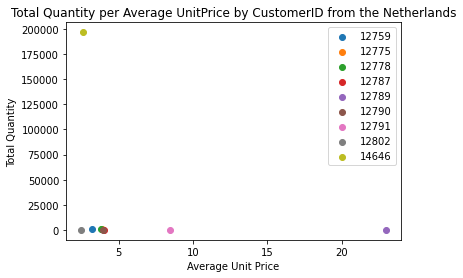

In [36]:
x1 = total_quantity.loc['Netherlands', 'AvgPrice'].values
y1 = total_quantity.loc['Netherlands', 'TotalQuantity'].values
pltlabels1 = total_quantity.loc['Netherlands'].index

for x, y, pltlabel in zip(x1, y1, pltlabels1):
            plt.scatter(x, y, label=pltlabel)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Average UnitPrice by CustomerID from the Netherlands')
plt.legend(labels=pltlabels1)

plt.show()


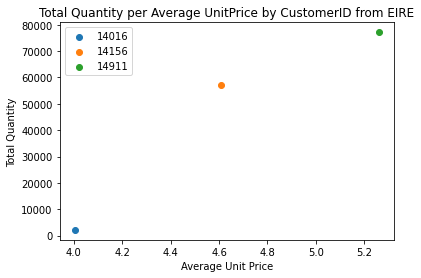

In [37]:
x2 = total_quantity.loc['EIRE', 'AvgPrice'].values
y2 = total_quantity.loc['EIRE', 'TotalQuantity'].values
pltlabels2 = total_quantity.loc['EIRE'].index

for x, y, pltlabel in zip(x2, y2, pltlabels2):
            plt.scatter(x, y, label=pltlabel)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Average UnitPrice by CustomerID from EIRE')
plt.legend(labels=pltlabels2)

plt.show()

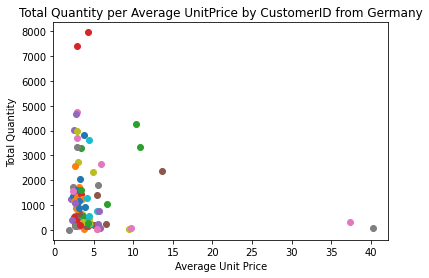

In [38]:
x3 = total_quantity.loc['Germany', 'AvgPrice'].values
y3 = total_quantity.loc['Germany', 'TotalQuantity'].values
pltlabels3 = total_quantity.loc['Germany'].index

for x, y, pltlabel in zip(x3, y3, pltlabels3):
            plt.scatter(x, y, label=pltlabel)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Average UnitPrice by CustomerID from Germany')
# plt.legend(labels=pltlabels3)

plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

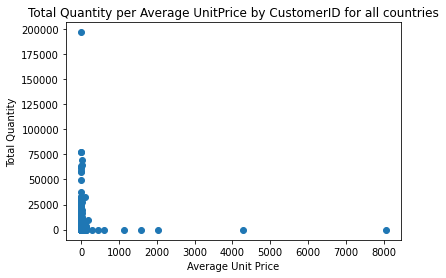

In [39]:
x4 = total_quantity['AvgPrice'].values
y4 = total_quantity['TotalQuantity'].values
# pltlabels4 = total_quantity.index.get_level_values(1)

# for x, y, pltlabel in zip(x4, y4, pltlabels4):
plt.scatter(x4, y4)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Average UnitPrice by CustomerID for all countries')
# plt.legend(labels=pltlabels3)

plt.show()


##### Step 7.4.2 Zoom in so we can see that curve more clearly

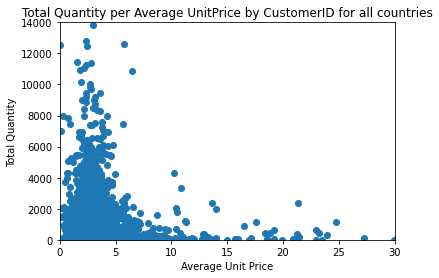

In [40]:
#zoom in
# for x, y, pltlabel in zip(x4, y4, pltlabels4):
plt.scatter(x4, y4)

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Average UnitPrice by CustomerID for all countries')
plt.xlim(0.0, 30.0)
plt.ylim(0.0, 14000.0)
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

#### 8.3 Plot.

In [41]:
online_rt1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [42]:
online_rt1['UnitPrice'] = online_rt1['UnitPrice'].apply(np.floor)
filter_unitprice = (online_rt1['UnitPrice'] >= 0) & (online_rt1['UnitPrice'] < 51)
online_rt2 = online_rt1[filter_unitprice]
unitprice = online_rt2.groupby('UnitPrice').sum()
unitprice.drop(columns=['CustomerID'], inplace=True)
unitprice

,Quantity,Revenue
UnitPrice,,
0.0,1939789,1.084166e+06
1.0,1733145,2.562359e+06
2.0,735657,1.803427e+06
3.0,239055,8.494923e+05
4.0,265276,1.199493e+06
5.0,65816,3.777059e+05
6.0,39347,2.619654e+05
7.0,37556,2.873267e+05
8.0,45441,3.816602e+05


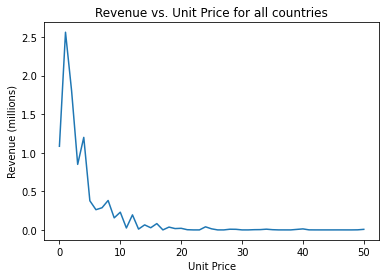

In [43]:
x = unitprice.index.values
y= unitprice['Revenue']
ymil= unitprice['Revenue'] / 1_000_000

plt.plot(x, ymil)

plt.xlabel('Unit Price')
plt.ylabel('Revenue (millions)')
plt.title('Revenue vs. Unit Price for all countries')

plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

### BONUS: Create your own question and answer it.